# Seaborn

자세한 사항은 Seaborn [홈페이지](https://seaborn.pydata.org/index.html)를 확인하자.

아래 내용은 Seaborn [튜토리얼](https://seaborn.pydata.org/tutorial.html) 중 일부이다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")

Seaborn에는 다음과 같은 plot 함수들이 포함되어 있다.

<img src="https://seaborn.pydata.org/_images/function_overview_8_0.png" width="400" height="300">

# Visualizing statistical relationships

## Relating variables with scatter plots

In [2]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


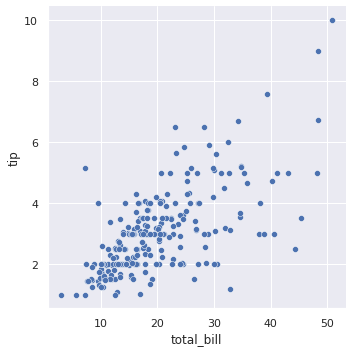

In [3]:
sns.relplot(x="total_bill", y="tip", data=tips, kind="scatter"); 
#sns.relplot(x="total_bill", y="tip", data=tips); #kind 속성의 default는 scatter

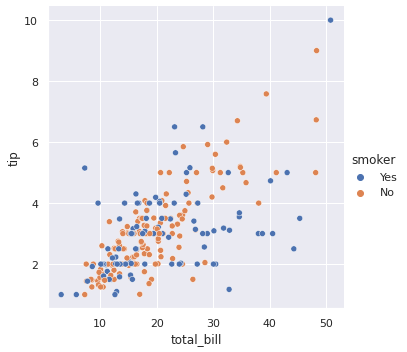

In [4]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips); # category에 따른 scatterplot

## Emphasizing continuity with line plots

In [5]:
df = pd.DataFrame(dict(time=np.arange(500),value=np.random.randn(500).cumsum()))
df.head()

,time,value
0,0,0.381522
1,1,0.637359
2,2,-0.685437
3,3,-1.721085
4,4,-2.588464


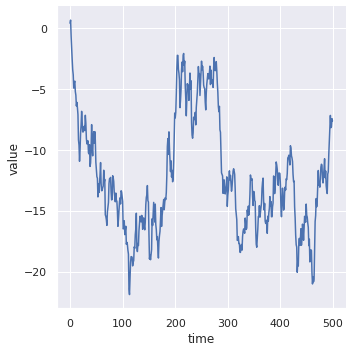

In [6]:
sns.relplot(x="time", y="value", kind="line", data=df); # kind 속성이 'line', x값을 정렬 후 plot

### Aggregation and representing uncertainty

In [7]:
fmri = sns.load_dataset("fmri") #자기공명영상 데이터
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


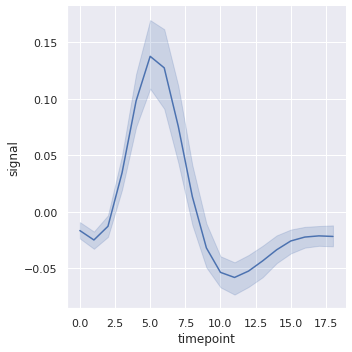

In [8]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri); # 동일한 x값에 대해 bootstrapping에 의한 95% confidence interval 

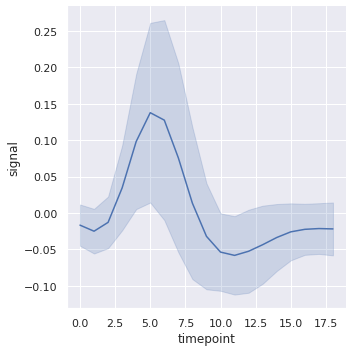

In [9]:
sns.relplot(x="timepoint", y="signal", ci="sd", kind="line", data=fmri); # 95% confidence interval 대신 standard deviation
# sns.relplot(x="timepoint", y="signal", ci=None, kind="line", data=fmri); 

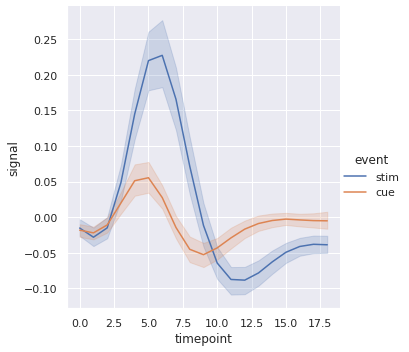

In [10]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri); # scatter plot처럼 category에 따른 plot

## Showing multiple relationships with facets

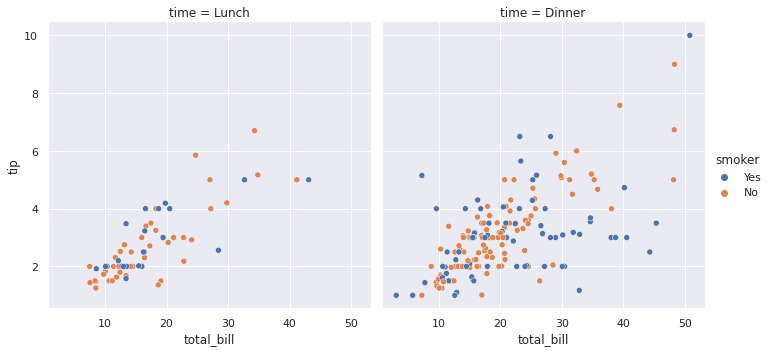

In [11]:
sns.relplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips); # col을 통한 multi plot

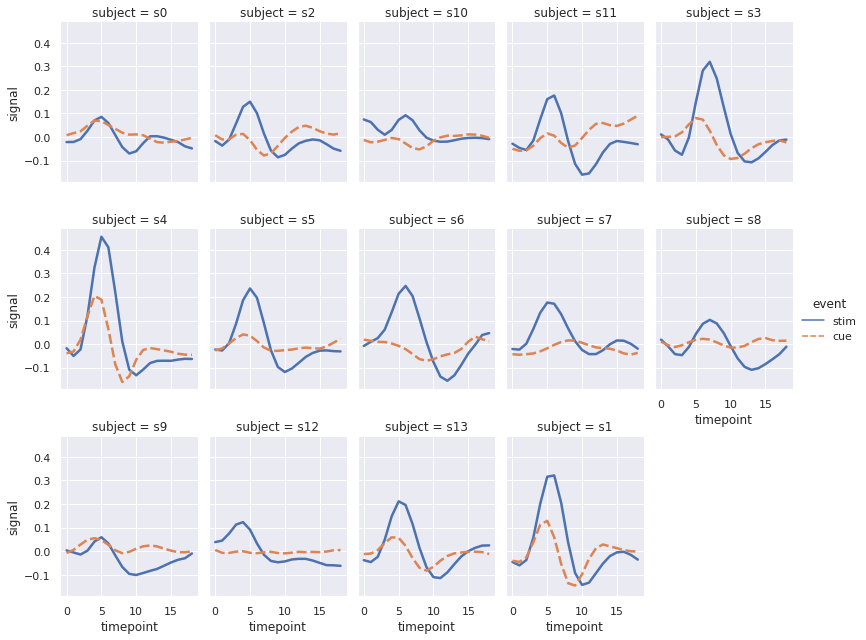

In [12]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"));

# Visualizing distributions of data

## Plotting univariate histograms

In [13]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


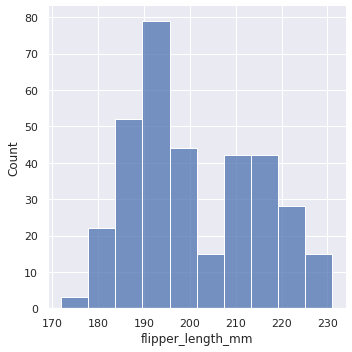

In [14]:
sns.displot(penguins, x="flipper_length_mm"); # 단일변수의 histogram

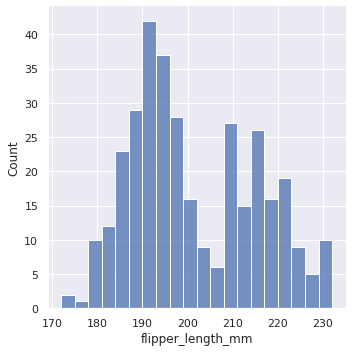

In [15]:
sns.displot(penguins, x="flipper_length_mm", binwidth=3); # bin의 폭 설정

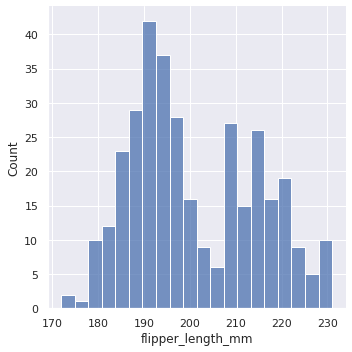

In [16]:
sns.displot(penguins, x="flipper_length_mm", bins=20); # bin의 개수 설정

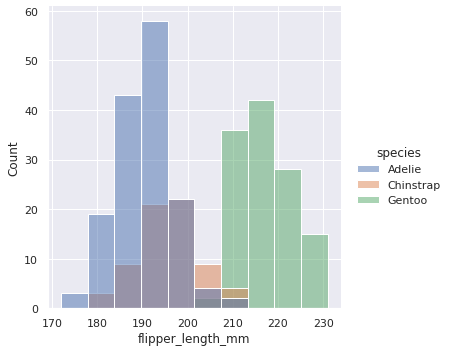

In [17]:
sns.displot(penguins, x="flipper_length_mm", hue="species"); # category
#sns.displot(penguins, x="flipper_length_mm", hue="species", element="step");
#sns.displot(penguins, x="flipper_length_mm", hue="species", multiple="stack");

In [18]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


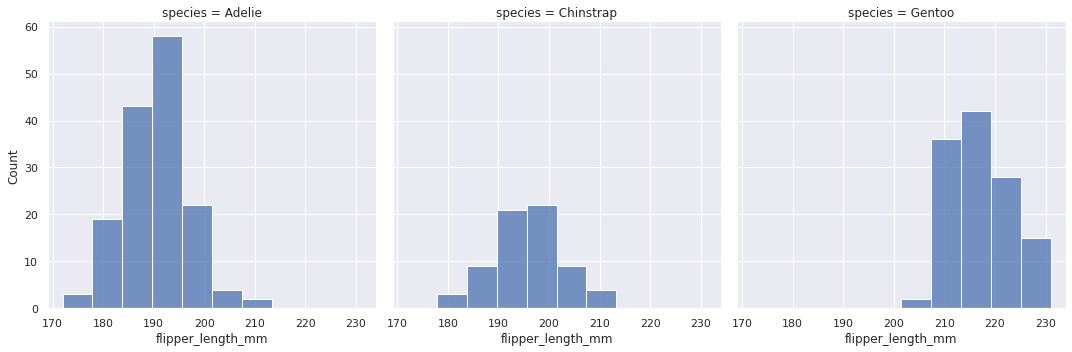

In [19]:
sns.displot(penguins, x="flipper_length_mm", col="species"); # multi plots

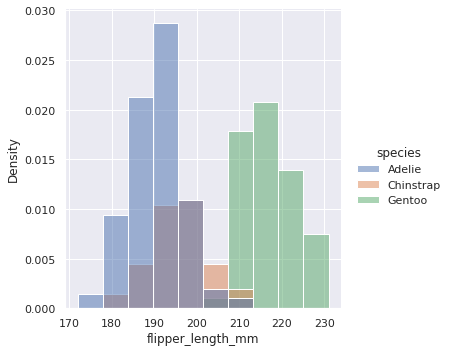

In [20]:
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="density"); # normalized (면적의 합이 1)
#sns.displot(penguins, x="flipper_length_mm", hue="species", stat="probability") # y축값의 합이 1

## Kernel density estimation (KDE)

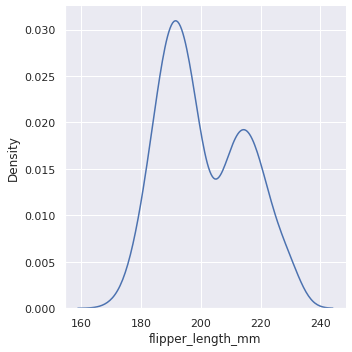

In [21]:
sns.displot(penguins, x="flipper_length_mm", kind="kde");

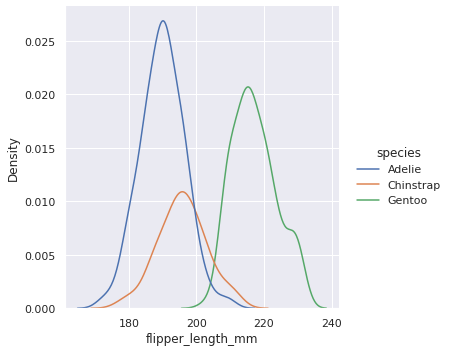

In [22]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde"); # category
#sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", fill=True)

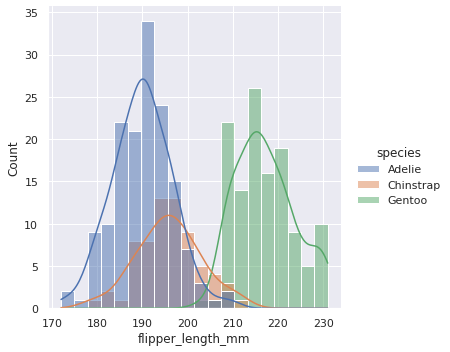

In [23]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kde=True, bins=20); # histogram + KDE

## Empirical cumulative distributions


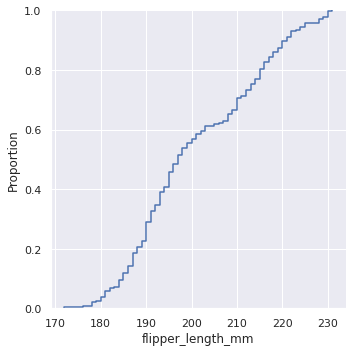

In [24]:
sns.displot(penguins, x="flipper_length_mm", kind="ecdf");

## Visualizing bivariate distributions

2개 변수에 대한 분포를 표현하다.

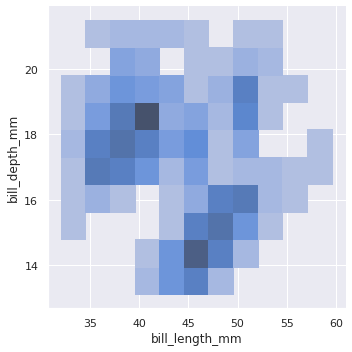

In [27]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm"); # y 사용

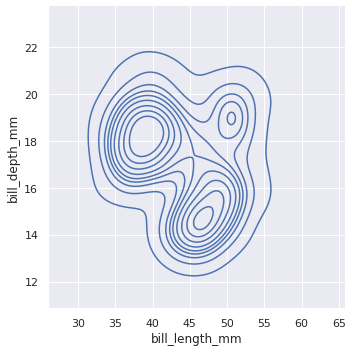

In [28]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde"); # kind 사용

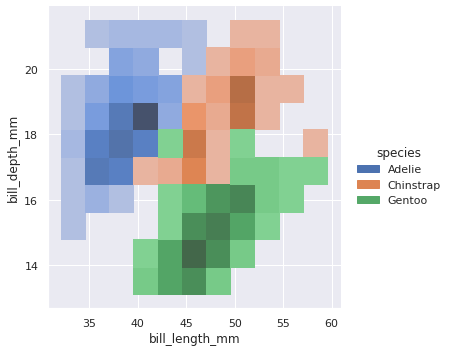

In [30]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species"); # category
#sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde");

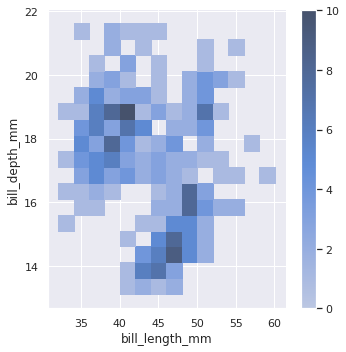

In [31]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", binwidth=(2, .5), cbar=True); # color bar

## Distribution visualization in other settings

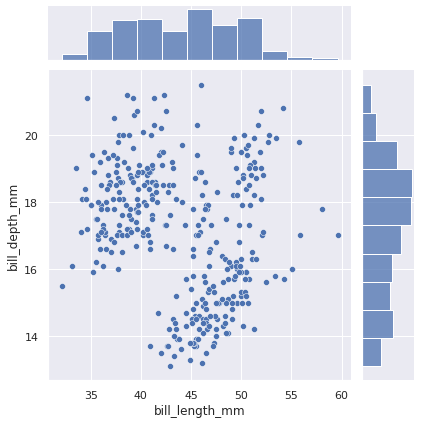

In [32]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm");

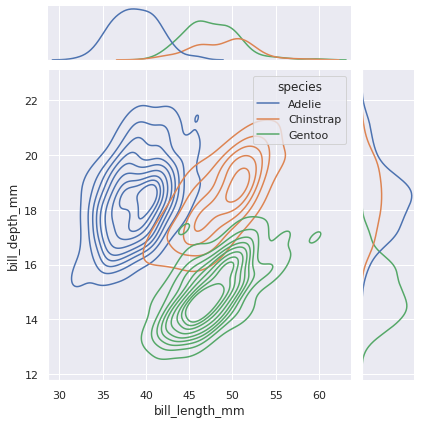

In [33]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde");

### Plotting many distributions

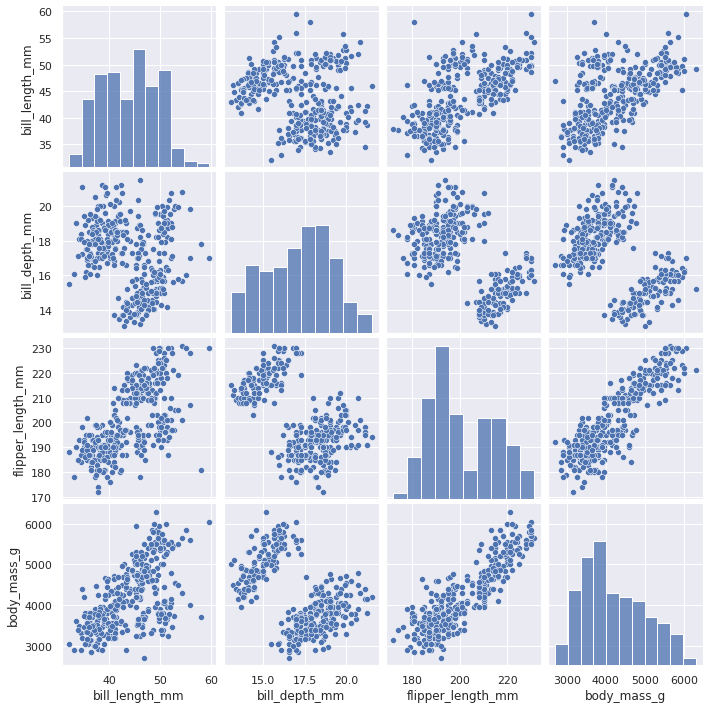

In [36]:
sns.pairplot(penguins);

# Plotting with categorical data

## Categorical scatterplots

In [39]:
sns.set_theme(style="ticks", color_codes=True)

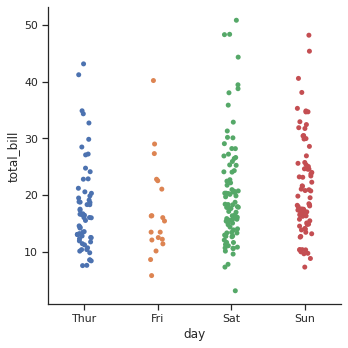

In [42]:
sns.catplot(x="day", y="total_bill", data=tips);
#sns.catplot(x="day", y="total_bill", jitter=False, data=tips);
#sns.catplot(x="day", y="total_bill", kind="swarm", data=tips)

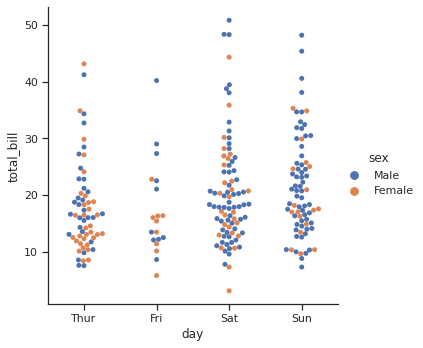

In [45]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips); # additional category
#sns.catplot(x="total_bill", y="day", hue="sex", kind="swarm", data=tips);

## Distributions of observations within categories

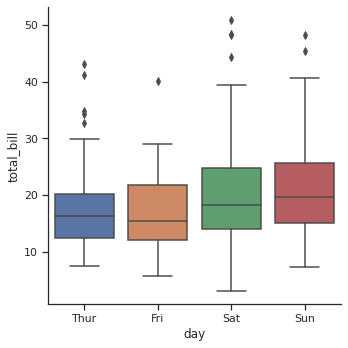

In [47]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips); # interquartile & outliers

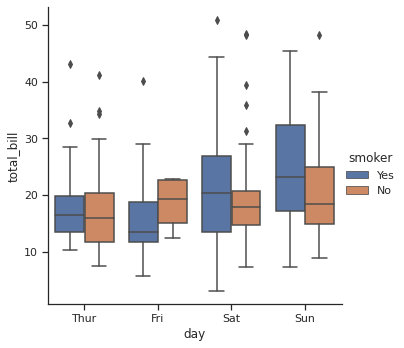

In [50]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips); #category
#sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips, dodge=False);

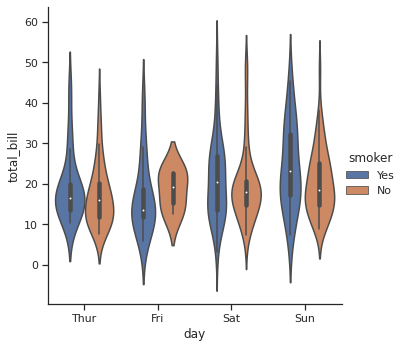

In [54]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="violin", data=tips); # KDE added
#sns.catplot(x="day", y="total_bill", hue="smoker", kind="violin", split=True, data=tips); # split

## Statistical estimation within categories

### Bar plot

In [ ]:
titanic = sns.load_dataset("titanic")

- bar plot은 default로 평균값을 그린다.
- error bar는 bootstrapping에 의한 confidence interval을 표현한다.

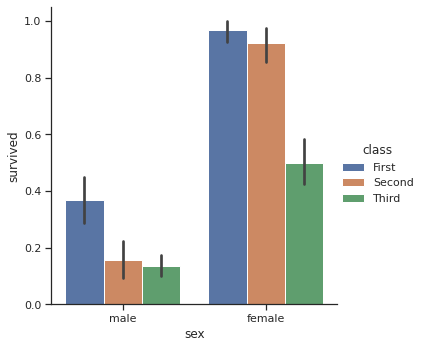

In [55]:
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic); # kind = bar

- 반면, count plot은 빈도수를 category에 따라 그리며 histogram과 비슷한 의미를 갖게 된다.

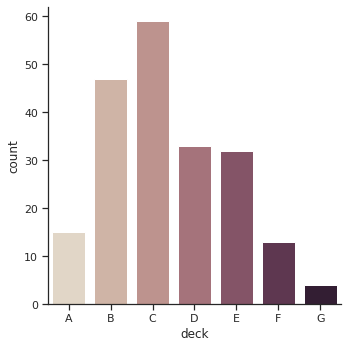

In [57]:
sns.catplot(x="deck", kind="count", palette="ch:.25", data=titanic);

### Point plots
- 다른 방법은 point plot을 그릴 수 있다.

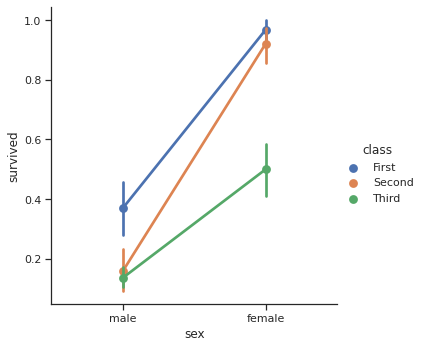

In [58]:
sns.catplot(x="sex", y="survived", hue="class", kind="point", data=titanic);

# Visualizing regression models

In [59]:
sns.set_theme(color_codes=True)

## Functions to draw linear regression models

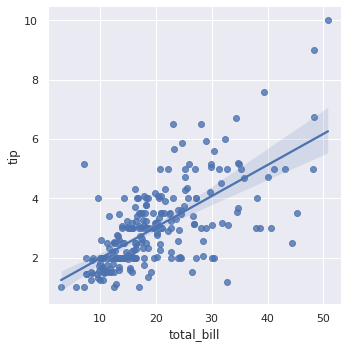

In [62]:
#sns.regplot(x="total_bill", y="tip", data=tips); # 95% confidence interval
sns.lmplot(x="total_bill", y="tip", data=tips); # 동일한 결과 

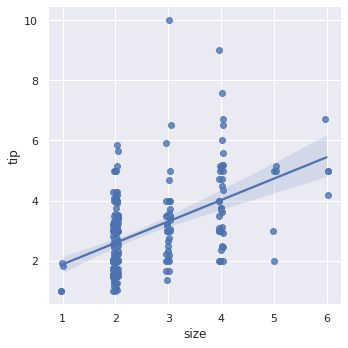

In [63]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05); # add noise in the case of discrete independent variable

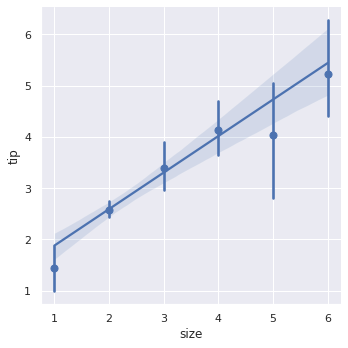

In [64]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean); # estimation with a confidence interval

## Conditioning on other variables

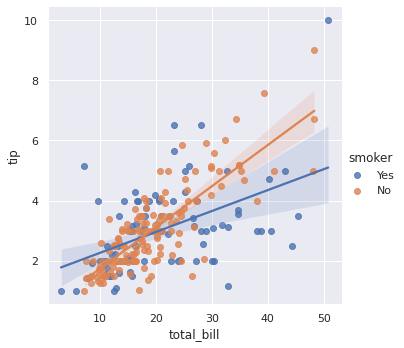

In [65]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips); # category

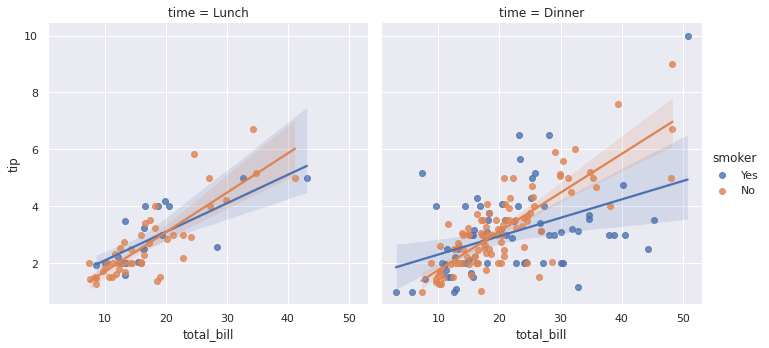

In [66]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips); # multiple facets

## Plotting a regression in other contexts

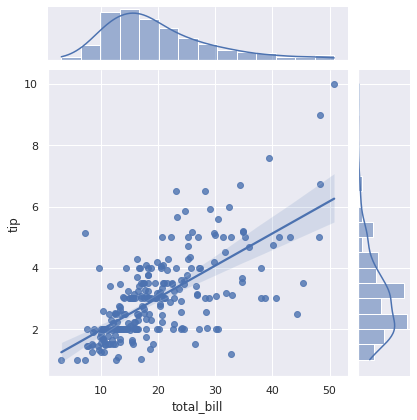

In [67]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg"); # kind

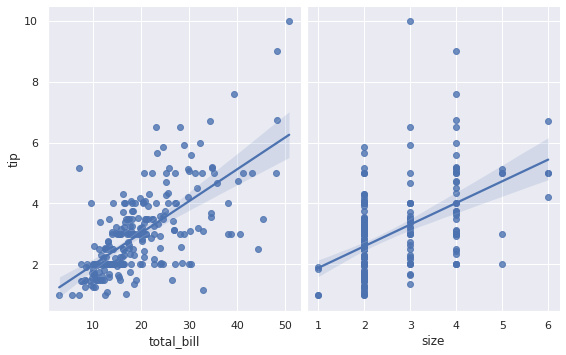

In [68]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             height=5, aspect=.8, kind="reg"); #kind